In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display
import mglearn

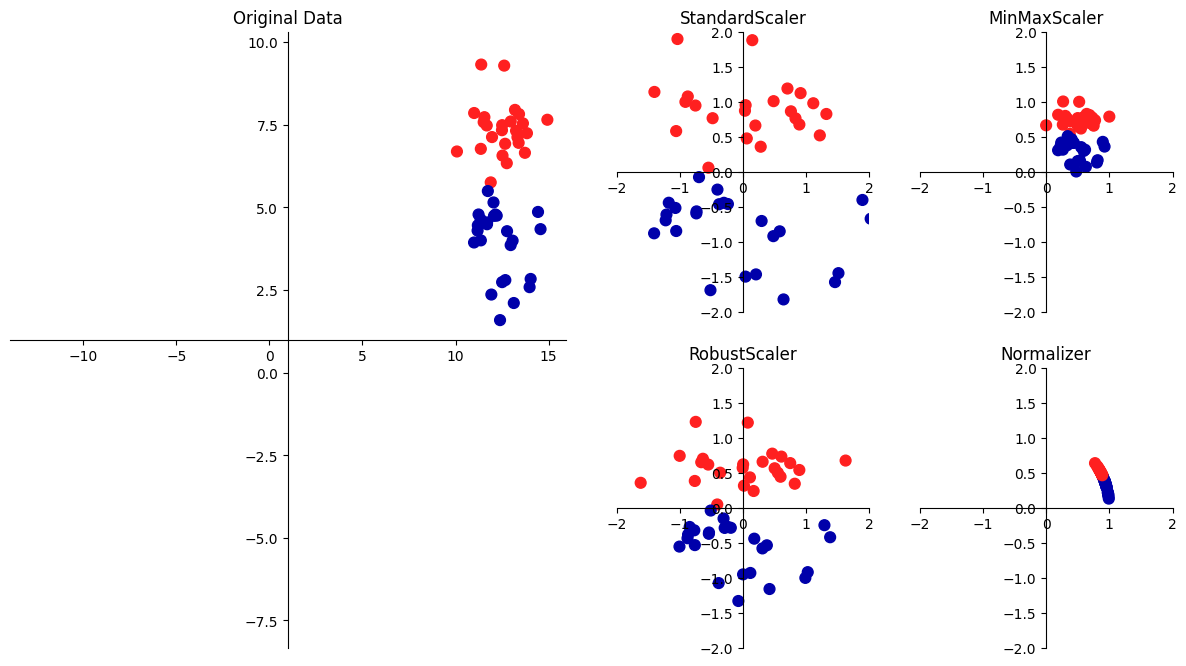

In [2]:
mglearn.plots.plot_scaling()

# Different Kinds of Preprocessing

**StandardScaler**

The *StandardScaler* from the `scikit-learn` ensures that for each feature the mean is 0 and the variance is 1, bringing all features to the same magnitude.
However, this method does not ensure any particualar minimum and maximum values for the features.

**RobustScaler**

The *RobustScaler* works similarly to the *StandardScaler* in that it ensures statistical properties for each feature that guarantee that they are on the same scale. 
However, the RobustScaler uses the median and quartiles, instead of mean and variance. This method ignores data points that are very different from the rest (like measurement errors). These odd data points are also called **outliers**, and can lead to trouble for other scaling techniques.

**MinMaxScaler**

The *MinMaxScaler*, on the other hand, shifts the data such that all features are exactly between 0 and 1. For the two-dimensional dataset this means all of the data is contained within the rectangle created by the x-axis between 0 and 1 and the y-axis between 0 and 1.

**Normalizer**

The *Normalizer* scales each data point such that the feature vector has Euclidian length of 1. In other words, it projects a data point on the circle (or sphere, in the case of higher dimensions) with a radius of 1. This means every data point is scaled by a different number (by the inverse of its length). This normalization is often used when the direction of the data matters, not the length of the feature vector.

In [3]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

bsc = load_breast_cancer()
X = bsc.data
y = bsc.target    
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

print("Shape of Train: {}".format(X_train.shape))
print("Shape of Test: {}".format(X_test.shape))

Shape of Train: (426, 30)
Shape of Test: (143, 30)


In [4]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

In [5]:
scaler.fit(X_train)

,"feature_range feature_range: tuple (min, max), default=(0, 1)Desired range of transformed data.","(0, ...)"
,"copy copy: bool, default=TrueSet to False to perform inplace row normalization and avoid acopy (if the input is already a numpy array).",True
,"clip clip: bool, default=FalseSet to True to clip transformed values of held-out data toprovided `feature_range`.Since this parameter will clip values, `inverse_transform` may notbe able to restore the original data... note:: Setting `clip=True` does not prevent feature drift (a distribution shift between training and test data). The transformed values are clipped to the `feature_range`, which helps avoid unintended behavior in models sensitive to out-of-range inputs (e.g. linear models). Use with care, as clipping can distort the distribution of test data... versionadded:: 0.24",False


In [6]:
# transform data 

X_train_scaled = scaler.transform(X_train)

# print dataset properties before and after scaling
print("transformed shape: {}".format(X_train_scaled.shape))
print("per-feature minimum before scaling: \n{}".format(X_train.min(axis=0)))
print("per-feature maximum before scaling: \n{}".format(X_train.max(axis=0)))
print("per-feature minimum after scaling: \n{}".format(X_train_scaled.min(axis=0)))
print("pre-feature maximum after scaling: \n{}".format(X_train_scaled.max(axis=0)))

transformed shape: (426, 30)
per-feature minimum before scaling: 
[6.981e+00 9.710e+00 4.379e+01 1.435e+02 5.263e-02 1.938e-02 0.000e+00
 0.000e+00 1.060e-01 5.024e-02 1.153e-01 3.602e-01 7.570e-01 6.802e+00
 1.713e-03 2.252e-03 0.000e+00 0.000e+00 9.539e-03 8.948e-04 7.930e+00
 1.202e+01 5.041e+01 1.852e+02 7.117e-02 2.729e-02 0.000e+00 0.000e+00
 1.566e-01 5.521e-02]
per-feature maximum before scaling: 
[2.811e+01 3.928e+01 1.885e+02 2.501e+03 1.634e-01 2.867e-01 4.268e-01
 2.012e-01 3.040e-01 9.575e-02 2.873e+00 4.885e+00 2.198e+01 5.422e+02
 3.113e-02 1.354e-01 3.960e-01 5.279e-02 6.146e-02 2.984e-02 3.604e+01
 4.954e+01 2.512e+02 4.254e+03 2.226e-01 9.379e-01 1.170e+00 2.910e-01
 5.774e-01 1.486e-01]
per-feature minimum after scaling: 
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]
pre-feature maximum after scaling: 
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]


**CHECKPOINT**

Maybe somewhat surprisingly, we can notice that for the test set, after scaling, the minimum and maximum are not 0 and 1. Some of the features are even outside the 0-1 range.

The explanation is that the `MinMaxScaler` (and all other scalers) always applies exactly the same transformation to the training and the test set. This means the `transform`
 
method always subtracts the training set minimum and divides by the training set range, which might be different from the minimum and range for the test set. 

In [7]:
# transform test data

X_test_scaled = scaler.transform(X_test)
# print data properties after scaling 
print("per-feature minimum after scaling: \n{}".format(X_test_scaled.min(axis=0)))
print("per-feature maximum after scaling: \n{}".format(X_test_scaled.max(axis=0)))

per-feature minimum after scaling: 
[ 0.0336031   0.0226581   0.03144219  0.01141039  0.14128374  0.04406704
  0.          0.          0.1540404  -0.00615249 -0.00137796  0.00594501
  0.00430665  0.00079567  0.03919502  0.0112206   0.          0.
 -0.03191387  0.00664013  0.02660975  0.05810235  0.02031974  0.00943767
  0.1094235   0.02637792  0.          0.         -0.00023764 -0.00182032]
per-feature maximum after scaling: 
[0.9578778  0.81501522 0.95577362 0.89353128 0.81132075 1.21958701
 0.87956888 0.9333996  0.93232323 1.0371347  0.42669616 0.49765736
 0.44117231 0.28371044 0.48703131 0.73863671 0.76717172 0.62928585
 1.33685792 0.39057253 0.89612238 0.79317697 0.84859804 0.74488793
 0.9154725  1.13188961 1.07008547 0.92371134 1.20532319 1.63068851]


## Scaling Training and Test Data the Same Way

It is important to apply exactly the same transformation to the training set and the test set for the supervised model to work on the test set.

C:\Users\DELL\AppData\Local\Temp\ipykernel_3508\3553283223.py:9: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  axes[0].scatter(X_train[:, 0], X_train[:, 1],
C:\Users\DELL\AppData\Local\Temp\ipykernel_3508\3553283223.py:11: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  axes[0].scatter(X_test[:, 0], X_test[:, 1], marker='^',
C:\Users\DELL\AppData\Local\Temp\ipykernel_3508\3553283223.py:21: UserWarning: *c* argument looks like 

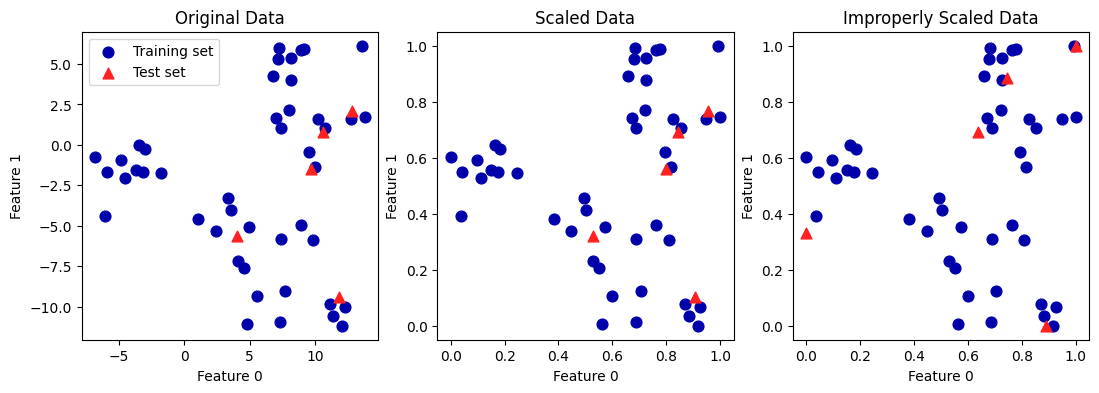

In [8]:
from sklearn.datasets import make_blobs
# make synthetic data
X, _ = make_blobs(n_samples=50, centers=5, random_state=4, cluster_std=2)
# split it into training and test sets
X_train, X_test = train_test_split(X, random_state=5, test_size=.1)
# plot the training and test sets
fig, axes = plt.subplots(1, 3, figsize=(13, 4))

axes[0].scatter(X_train[:, 0], X_train[:, 1],
c=mglearn.cm2(0), label="Training set", s=60)
axes[0].scatter(X_test[:, 0], X_test[:, 1], marker='^',
c=mglearn.cm2(1), label="Test set", s=60)
axes[0].legend(loc='upper left')
axes[0].set_title("Original Data")
# scale the data using MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
# visualize the properly scaled data
axes[1].scatter(X_train_scaled[:, 0], X_train_scaled[:, 1],
c=mglearn.cm2(0), label="Training set", s=60)
axes[1].scatter(X_test_scaled[:, 0], X_test_scaled[:, 1], marker='^',
c=mglearn.cm2(1), label="Test set", s=60)
axes[1].set_title("Scaled Data")
# rescale the test set separately
# so test set min is 0 and test set max is 1
# DO NOT DO THIS! For illustration purposes only.
test_scaler = MinMaxScaler()
test_scaler.fit(X_test)
X_test_scaled_badly = test_scaler.transform(X_test)
# visualize wrongly scaled data
axes[2].scatter(X_train_scaled[:, 0], X_train_scaled[:, 1],
c=mglearn.cm2(0), label="training set", s=60)
axes[2].scatter(X_test_scaled_badly[:, 0], X_test_scaled_badly[:, 1],
marker='^', c=mglearn.cm2(1), label="test set", s=60)
axes[2].set_title("Improperly Scaled Data")
for ax in axes:
    ax.set_xlabel("Feature 0")
    ax.set_ylabel("Feature 1")

In [9]:
# PLACEHOLDER
# TBC

## Dimensionality Reduction, Feauture Extraction, and Manifold Learning

**Principal Component Analysis**

In [11]:
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
bsc = load_breast_cancer()

X = bsc.data
y = bsc.target

scaler = StandardScaler()
scaler.fit(X)

X_scaled = scaler.transform(X)

In [ ]:
from sklearn.decomposition import PCA

# keep the first two principal components
pca = PCA(n_components=2)
# fit PCA model on the scaled dataset
pca.fit(X_scaled)
# transform data onto the first two principal componenets
X_pca = pca.transform(X_scaled)

print("Original shape: {}".format(str(X_scaled.shape)))
print("Reduced shape: {}".format(str(X_pca.shape)))

Original Shape: (569, 30)
Reduced Shape: (569, 2)


Text(0, 0.5, 'Second principal component')

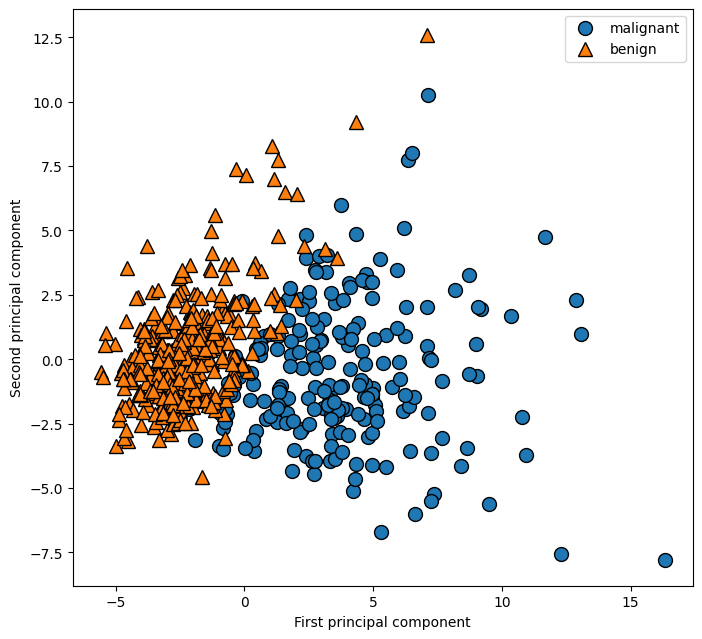

In [20]:
# plot frst vs. second principal component colored by class
plt.figure(figsize=(8, 8))
mglearn.discrete_scatter(X_pca[:, 0], X_pca[:, 1], y)
plt.legend(bsc.target_names, loc="best")
plt.gca().set_aspect("equal")
plt.xlabel("First principal component")
plt.ylabel("Second principal component")


In [ ]:
print("PCA Component Shape: {}".format(pca.components_.shape))
print("\nPCA Components: \n{}".format(pca.components_))

# Each row in the pca.components_ corresponds to one principal component and they are sorted by importance.
# The columns correspond to the original features of the data like 'mean_radius', 'mean_texture', etc...

PCA Component Shape: (2, 30)

PCA Components: 
[[ 0.21890244  0.10372458  0.22753729  0.22099499  0.14258969  0.23928535
   0.25840048  0.26085376  0.13816696  0.06436335  0.20597878  0.01742803
   0.21132592  0.20286964  0.01453145  0.17039345  0.15358979  0.1834174
   0.04249842  0.10256832  0.22799663  0.10446933  0.23663968  0.22487053
   0.12795256  0.21009588  0.22876753  0.25088597  0.12290456  0.13178394]
 [-0.23385713 -0.05970609 -0.21518136 -0.23107671  0.18611302  0.15189161
   0.06016536 -0.0347675   0.19034877  0.36657547 -0.10555215  0.08997968
  -0.08945723 -0.15229263  0.20443045  0.2327159   0.19720728  0.13032156
   0.183848    0.28009203 -0.21986638 -0.0454673  -0.19987843 -0.21935186
   0.17230435  0.14359317  0.09796411 -0.00825724  0.14188335  0.27533947]]


C:\Users\DELL\AppData\Local\Temp\ipykernel_3508\2754533669.py:9: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


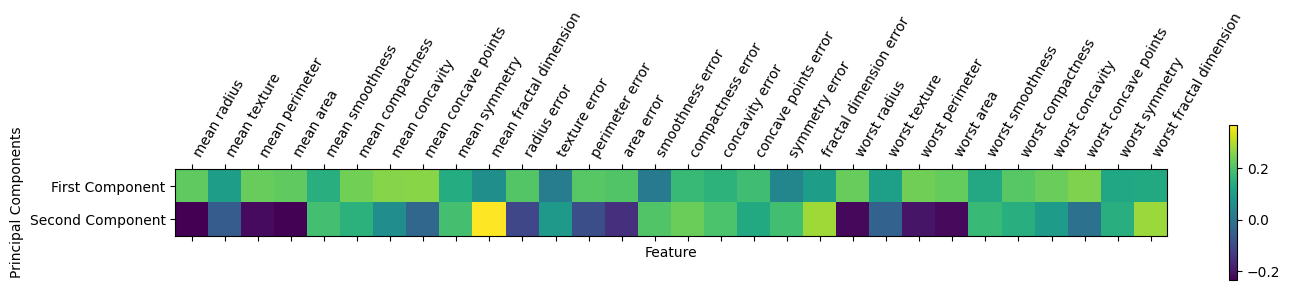

In [30]:
plt.matshow(pca.components_, cmap='viridis')
plt.yticks([0, 1], ["First Component", "Second Component"])
plt.colorbar()

plt.xticks(range(len(bsc.feature_names)), bsc.feature_names, rotation=60, ha='left')
plt.xlabel("Feature")
plt.ylabel("Principal Components")

plt.tight_layout()
plt.show()

**Eigenfaces for Feature Extractions**

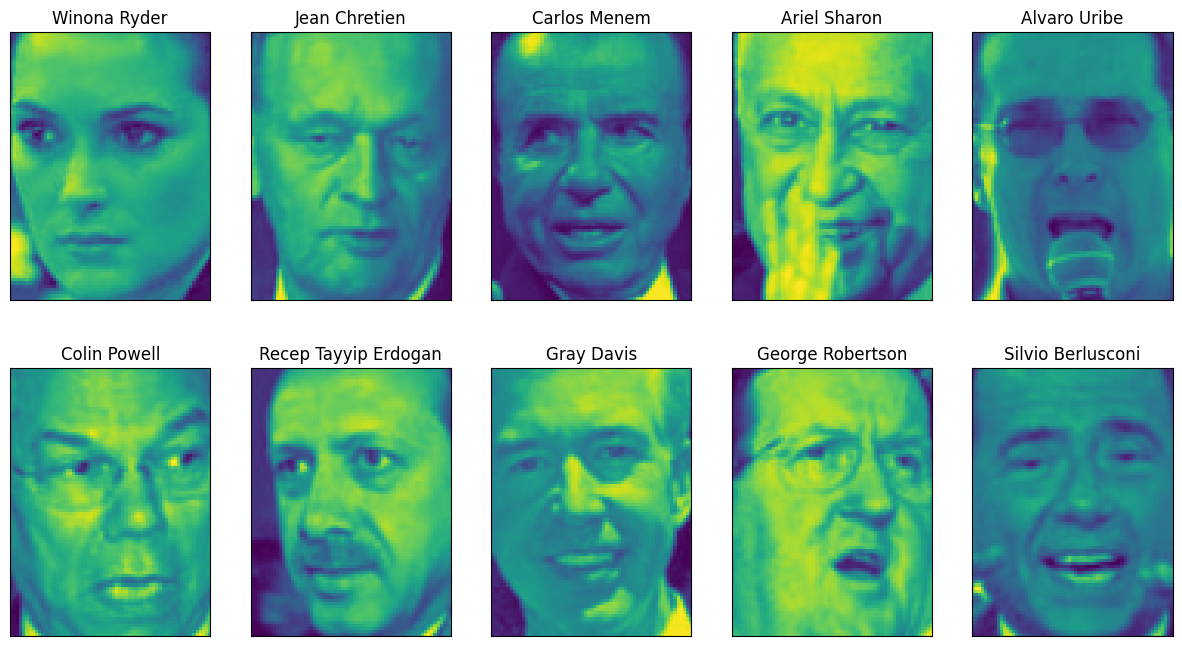

In [32]:
# Feature Extraction on Images
from sklearn.datasets import fetch_lfw_people
people = fetch_lfw_people(min_faces_per_person=20, resize=0.7)
image_shape = people.images[0].shape

fig, axes = plt.subplots(nrows = 2, ncols = 5, figsize=(15, 8),
                         subplot_kw={'xticks': (), 'yticks': ()})
for target, image, ax in zip(people.target, people.images, axes.ravel()):
    ax.imshow(image)
    ax.set_title(people.target_names[target])

In [33]:
print("people.images shape: {}".format(people.images.shape))
print("Number of classes: {}".format(len(people.target_names)))

people.images shape: (3023, 87, 65)
Number of classes: 62


In [34]:
# The dataset is a little skewed so we add counts to solve.

# count how often each target appears
counts = np.bincount(people.target)
# print counts next to target names
for i, (count, name) in enumerate(zip(counts, people.target_names)):
    print("{0:25} {1:3}".format(name, count), end = '    ')
    if (i + 1) % 3 == 0:
        print()

Alejandro Toledo           39    Alvaro Uribe               35    Amelie Mauresmo            21    
Andre Agassi               36    Angelina Jolie             20    Ariel Sharon               77    
Arnold Schwarzenegger      42    Atal Bihari Vajpayee       24    Bill Clinton               29    
Carlos Menem               21    Colin Powell              236    David Beckham              31    
Donald Rumsfeld           121    George Robertson           22    George W Bush             530    
Gerhard Schroeder         109    Gloria Macapagal Arroyo    44    Gray Davis                 26    
Guillermo Coria            30    Hamid Karzai               22    Hans Blix                  39    
Hugo Chavez                71    Igor Ivanov                20    Jack Straw                 28    
Jacques Chirac             52    Jean Chretien              55    Jennifer Aniston           21    
Jennifer Capriati          42    Jennifer Lopez             21    Jeremy Greenstock          24    


In [35]:
mask = np.zeros(people.target.shape, dtype=np.bool)
for target in np.unique(people.target):
    mask[np.where(people.target == target)[0][:50]] = 1

X_people = people.data[mask]
y_people = people.target[mask]

# scale the grayscale values to be between 0 and 1
# instead of 0 and 255 for better numeric stability
X_people = X_people / 255.

In [38]:
from sklearn.neighbors import KNeighborsClassifier
# split data into train and test

X_train, X_test, y_train, y_test = train_test_split(
    X_people, y_people, 
    stratify=y_people,
    random_state=0
    )

# build a kNN classifier
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)

print("Score on test data (1-knn): {: .3f}".format(knn.score(X_test, y_test)))

Score on test data (1-knn):  0.215


In [39]:
# We enable whitening while fitting the pca model. Whitening scales the data

pca = PCA(n_components=100, whiten=True, random_state=0).fit(X_train)
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

print("X_train pca shape: {}".format(X_train_pca.shape))

X_train pca shape: (1547, 100)


In [41]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train_pca, y_train)

print("Score on test data (PCA n_comp. = 100, knn = 1): {: .4f}".format(knn.score(X_test_pca, y_test)))

Score on test data (PCA n_comp. = 100, knn = 1):  0.2965


In [42]:
print("pca.components_shape: {}".format(pca.components_.shape))

pca.components_shape: (100, 5655)


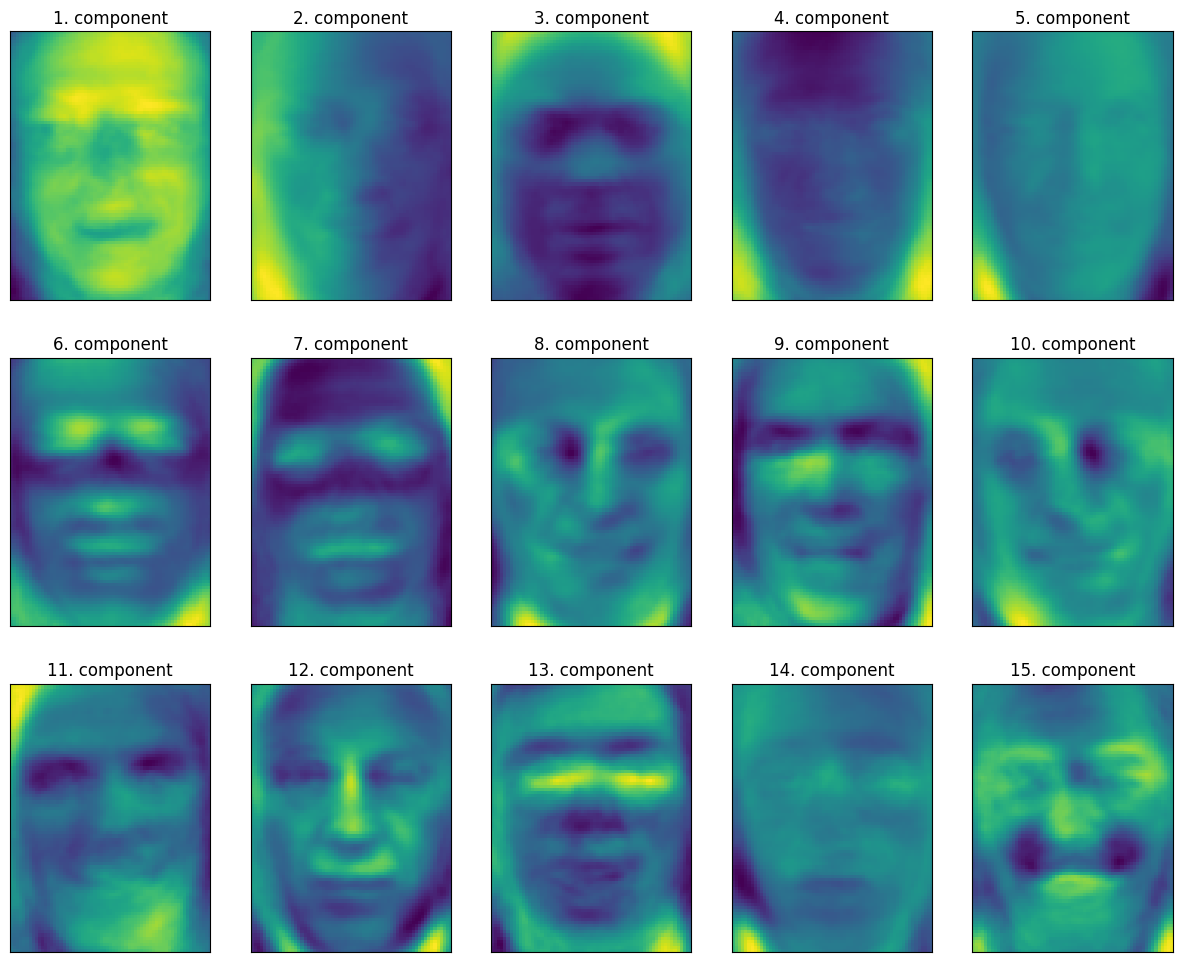

In [45]:
fig, axes = plt.subplots(nrows=3, ncols=5, figsize=(15, 12), 
                         subplot_kw={'xticks': (), 'yticks': ()})
for i, (component, ax) in enumerate(zip(pca.components_, axes.ravel())):
    ax.imshow(component.reshape(image_shape), cmap='viridis')
    ax.set_title("{}. component".format((i + 1)))

**Non-Negative Matrix Factorization (NMF)**

Description:

As in `PCA`, we are trying to write each data point as a weighted sum of some components. But whereas in PCA we wanted components that were 

orthogonal and that explained as much variance of the data as possible, in NMF, we want the components and the coefficients to be non negative; that is, we want both components 

and the coefficients to be greater than or equal to zero. Consequently, this method can only be applied to data where each feature is non-negative, as a non-negative sum of 

non-negative components cannot become negative.

**Applying NMF to synthetic data**

c:\Users\DELL\AppData\Local\Python\pythoncore-3.14-64\Lib\site-packages\sklearn\decomposition\_nmf.py:1720: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


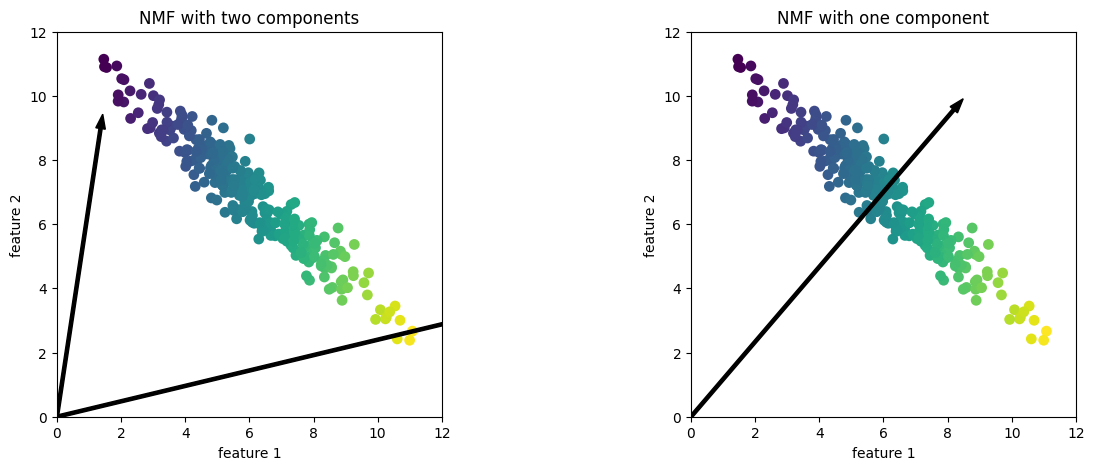

In [48]:
mglearn.plots.plot_nmf_illustration()

For NMF with two components, as shown on the left, it is clear that all points in the data can be written as a positive combination of the two components. If there are enough 

components to perfectly reconstruct the data (as many components as there are features), the algorithm will choose directions that point toward the extremes of the data. If we 

only use a single component, NMF creates a component that points toward the mean, as pointing there best explains the data. You can see that in contrast with PCA, reducing the 

number of components not only removes some directions, but creates an entirely different set of components! Components in NMF are also not ordered in any specific way, so there 

is no “first non-negative component”: all components play an equal part. NMF uses a random initialization, which might lead to different results depending on the random seed. In 

relatively simple cases such as the synthetic data with two com ponents, where all the data can be explained perfectly, the randomness has little effect (though it might change 

the order or scale of the components). In more complex sit uations, there might be more drastic changes.

**Applying NMF to face Images**

In [51]:
from sklearn.decomposition import NMF
nmf = NMF(n_components=15, random_state=0, max_iter=10000)
nmf.fit(X_train)

X_train_nmf = nmf.transform(X_train)
X_test_nmf = nmf.transform(X_test)

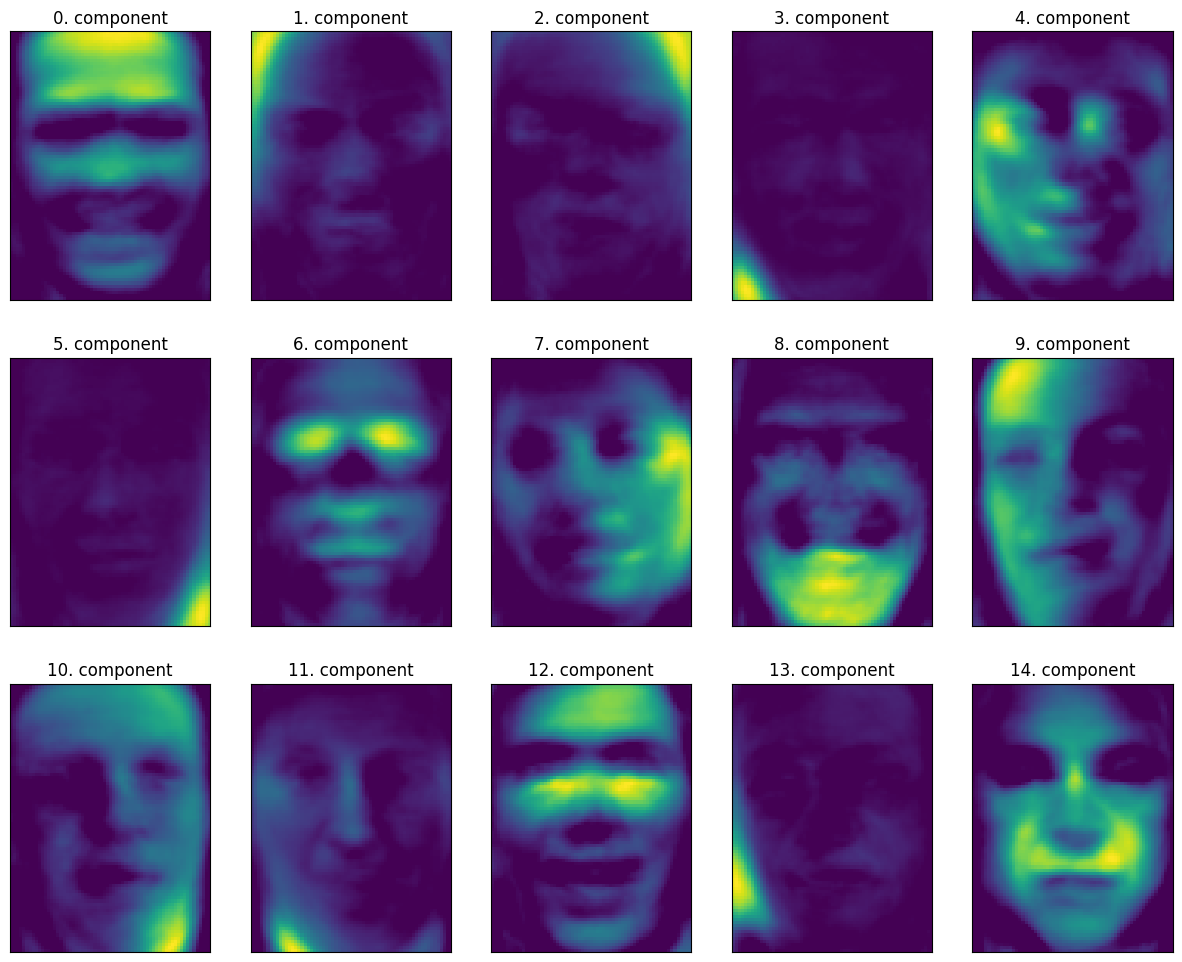

In [52]:
fig, axes = plt.subplots(nrows=3, ncols=5, figsize=(15, 12),
                         subplot_kw={'xticks': (), 'yticks': ()})
for i, (component, ax) in enumerate(zip(nmf.components_, axes.ravel())):
    ax.imshow(component.reshape(image_shape))
    ax.set_title("{}. component".format(i))

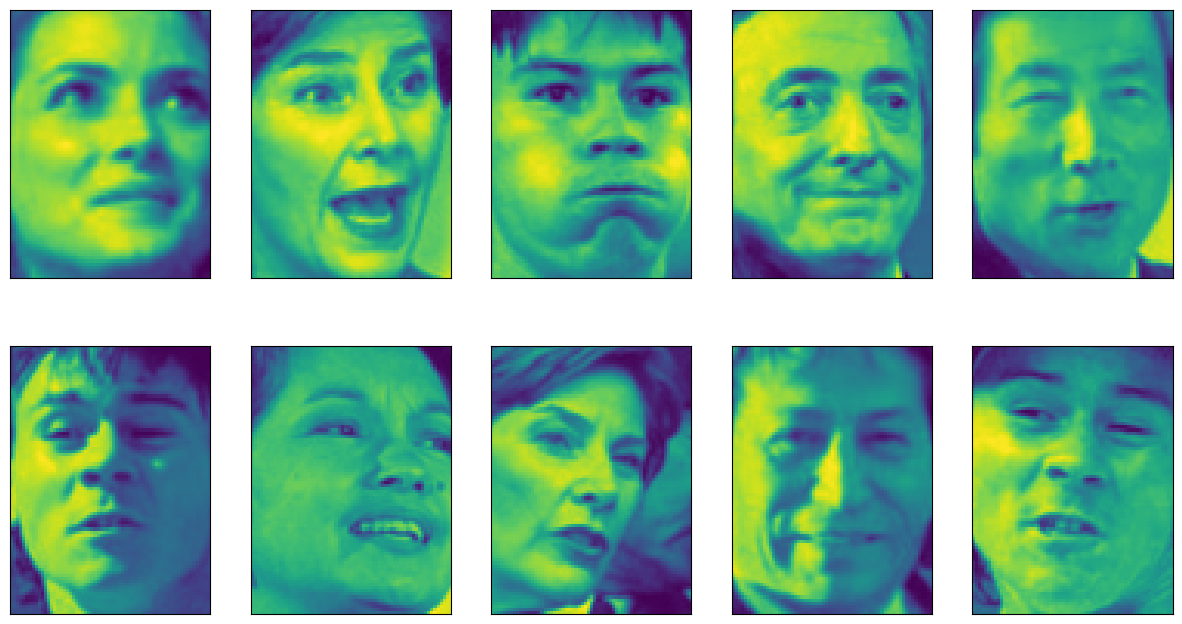

In [56]:
compn = 4
# sort by 3rd component, plot first 10 images
inds = np.argsort(X_train_nmf[:, compn])[::-1]
fig, axes = plt.subplots(2, 5, figsize=(15, 8),
                         subplot_kw={'xticks': (), 'yticks': ()})
for i, (ind, ax) in enumerate(zip(inds, axes.ravel())):
    ax.imshow(X_train[ind].reshape(image_shape))

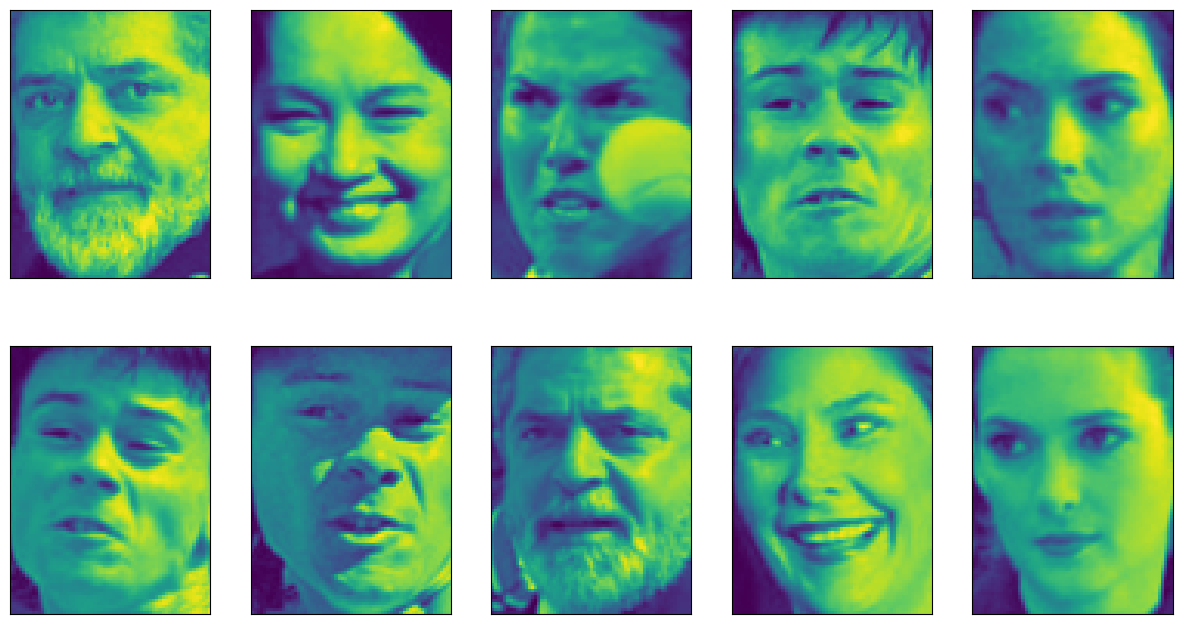

In [55]:
compn = 7
# sort by 7th component, plot first 10 images
inds = np.argsort(X_train_nmf[:, compn])[::-1]
fig, axes = plt.subplots(2, 5, figsize=(15, 8),
                         subplot_kw={'xticks': (), 'yticks': ()})
for i, (ind, ax) in enumerate(zip(inds, axes.ravel())):
    ax.imshow(X_train[ind].reshape(image_shape))

In [ ]:
# TC